# Component 1 - Transportable Array

## Import Modules and Data

In [2]:
%matplotlib inline

In [18]:
from haversine import haversine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import ipywidgets
import matplotlib.gridspec as gridspec
import cartopy
from matplotlib import animation
from IPython.display import Audio
import seaborn as sns

## Load Transportable Array Data

In [19]:
array_vals = pd.read_csv("data-readonly/transportable_array/data_tohoku_norm_transpose.csv", header=None)

In [5]:
## This code comes from Prof Turk. Translates our 4 hour time period into the time of day between 2:46pm and 6:46pm. 
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

In [6]:
date_range = pd.date_range("2:46PM", "6:46PM", freq="1s")

In [21]:
# Now bringing in longitude and latitudes of stations
locations = pd.read_csv("/srv/nbgrader/data/transportable_array/location.txt",
                        delimiter="\t", names =["longitude", "latitude", "a", "b"])
del locations["a"], locations["b"]
locations = locations.T
locations.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
longitude,-98.683,-98.102,-98.068,-117.110,-107.790,-98.916,-98.079,-97.410,-96.530,-95.756,...,-93.280,-98.765,-97.916,-97.253,-96.434,-95.623,-94.985,-94.182,-93.400,-92.803
latitude,27.065,26.938,26.463,32.889,32.532,32.608,32.573,32.557,32.475,32.597,...,34.012,33.286,33.371,33.331,33.270,33.198,33.260,33.242,33.258,33.258


## Stations DataFrame

In [20]:
stations = pd.concat([locations, array_vals]) 
stations.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
longitude,-98.683000,-98.102000,-98.068000,-117.110000,-107.790000,-98.916000,-98.079000,-97.410000,-96.530000,-95.756000,...,-93.280000,-98.765000,-97.916000,-97.253000,-96.434000,-95.623000,-94.985000,-94.182000,-93.400000,-92.803000
latitude,27.065000,26.938000,26.463000,32.889000,32.532000,32.608000,32.573000,32.557000,32.475000,32.597000,...,34.012000,33.286000,33.371000,33.331000,33.270000,33.198000,33.260000,33.242000,33.258000,33.258000
0,-0.000255,-0.000068,0.000406,-0.000275,0.000070,0.000041,-0.000070,-0.000040,0.000152,0.000039,...,-0.000156,0.000025,0.000064,0.000047,0.000030,0.000080,0.000051,0.000156,0.000282,-0.000024
1,-0.000238,-0.000085,0.000411,-0.000293,0.000085,0.000058,-0.000027,-0.000042,0.000141,0.000151,...,-0.000118,0.000127,0.000029,0.000056,0.000093,0.000016,0.000016,0.000056,0.000280,-0.000036
2,-0.000220,-0.000102,0.000413,-0.000308,0.000099,0.000073,0.000015,-0.000042,0.000129,0.000259,...,-0.000080,0.000225,-0.000005,0.000065,0.000153,-0.000046,-0.000019,-0.000042,0.000275,-0.000049


## Calculating Distances with Haversine

In [22]:
# longitude and latitude of Tohoku quake c/o Google 
tohoku_quake = (38.3, 142.4)
station1 = stations[3][1], stations[3][0] # latitude then longitude
haversine(tohoku_quake, station1, miles = True)

dists = [] # empty list for distances
for s in stations: #iterate over stations dataframe
    station = stations[s][1], stations[s][0] #pull coordinates
    dist = haversine(tohoku_quake, station, miles = True) # calculate distances using haversine set to miles
    dists.append(dist) # add to distances list
    
distances = pd.DataFrame(dists) # convert to Dataframe
distances.columns = ['dist'] # rename
distances.sort_values(by = 'dist', inplace = True, ascending = True) # sort

## Dataframe with Stations, Distances, Coordinates, Time & Reading Values

In [44]:
test2 = stations.T

distOrder = pd.merge(distances, left_index=True, right_index=True, right=test2)

new_df = pd.DataFrame(distOrder)
new_df.reset_index(inplace = True)

new_df.head()

,index,dist,longitude,latitude,0,1,2,3,4,5,...,14391,14392,14393,14394,14395,14396,14397,14398,14399,14400
0,123,8874.083699,-122.770,47.179,0.006577,0.006650,0.006660,0.006616,0.006528,0.006404,...,-0.016533,-0.016002,-0.015280,-0.014373,-0.013294,-0.012066,-0.010723,-0.009306,-0.007864,0.000000
1,193,8874.431614,-123.850,44.106,0.002861,0.003157,0.003419,0.003642,0.003827,0.003970,...,-0.005995,-0.005475,-0.004947,-0.004422,-0.003909,-0.003413,-0.002940,-0.002495,-0.002083,-0.001708
2,242,8874.552384,-81.333,35.142,0.002128,0.001515,0.000905,0.000318,-0.000232,-0.000734,...,-0.013640,-0.014851,-0.015597,-0.015856,-0.015635,-0.014969,-0.013917,-0.012557,-0.010980,0.000000
3,179,8874.591010,-122.740,44.523,0.001393,0.001376,0.001347,0.001307,0.001260,0.001208,...,-0.008156,-0.007508,-0.006837,-0.006157,-0.005481,-0.004820,-0.004186,-0.003588,-0.003030,-0.002516
4,137,8874.607710,-122.570,46.557,0.001143,0.001264,0.001374,0.001469,0.001549,0.001611,...,-0.000869,-0.000480,-0.000142,0.000132,0.000331,0.000452,0.000499,0.000482,0.000418,0.000000


## Line Plot

In [45]:
######################################
#**** SEISMOGRAPH LINE PLOT ONLY ****#
######################################
@ipywidgets.interact(time = (0, 14400, 1), station = (0, 437, 1))
def make_plot(time = 2000, station = 0):
    i = 5
    plt.subplot(211)
    plt.plot(new_df.loc[station][4:i+time].values)
    plt.xlim(0, 14000)
    plt.ylim(-1.0, 1.0)

interactive(children=(IntSlider(value=2000, description='time', max=14400), IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-interact',))

## Spectrogram

In [46]:
##############################################
#**** SEISMOGRAPH READINGS NORMALIZED(?) ****#
##############################################

testt.fillna(0, inplace = True)
@ipywidgets.interact(time = (0, 14400, 1), station = (0, 437, 1))
def make_plot(time = 2000, station = 0):
    i = 5
    vals = array_vals
    normalisedVals = ( vals - np.nanmin(vals) ) / ( np.nanmax(vals) - np.nanmin(vals) )
    normalisedVals = normalisedVals.astype(np.float)

    plt.hexbin(np.arange(14401), np.abs(new_df.loc[station][4:].values), bins = 'log')

interactive(children=(IntSlider(value=2000, description='time', max=14400), IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-interact',))

## Spectrogram (?) & Line Plot

In [47]:
################################
#**** SEISMOGRAPH READINGS ****#
################################

@ipywidgets.interact(time = (0, 14400, 1), station = (0, 437, 1))
def make_plot(time = 2000, station = 0):
    i = 5
    plt.subplot(211)
    plt.plot(new_df.loc[station][4:i+time].values)
    plt.xlim(0, 14000)
    plt.ylim(-1.0, 1.0)
    
    vmin = array_vals.min().min() 
    vmax = array_vals.max().max()
    
    plt.subplot(212)
    plt.hexbin(np.arange(14401), np.abs(new_df.loc[station][4:].values), bins = 'log')
    plt.colorbar()

interactive(children=(IntSlider(value=2000, description='time', max=14400), IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-interact',))

## Stations Map


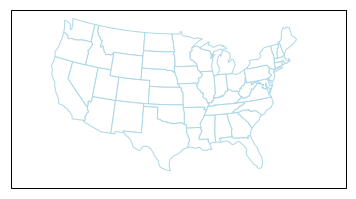

interactive(children=(IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-interact',))

In [52]:
##################################
#******* STATION LOCATOR ********# 
##################################

states = cartopy.io.shapereader.natural_earth(resolution='110m',
                                              category='cultural',
                                              name='admin_1_states_provinces_lakes_shp')
reader = cartopy.io.shapereader.Reader(states)
all_states = list(reader.records())
all_states[0]
geometries = [state.geometry for state in all_states]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal())
ax1.set_extent([-125, -66.5, 20, 50], cartopy.crs.Geodetic())
ax1.add_geometries(geometries, crs = cartopy.crs.PlateCarree(), facecolors = 'white', edgecolors = 'lightblue', zorder = 0)

@ipywidgets.interact(station = (0, 437, 1))
def plot_station(station = 0):
    scat = ax1.scatter(new_df.loc[station]['longitude'], 
                new_df.loc[station]['latitude'], 
                transform = cartopy.crs.Geodetic(), 
                s = 5, 
                c = 'b',
               zorder = 1)

In [53]:
states = cartopy.io.shapereader.natural_earth(resolution='110m',
                                          category='cultural',
                                          name='admin_1_states_provinces_lakes_shp')
reader = cartopy.io.shapereader.Reader(states)
all_states = list(reader.records())
all_states[0]
geometries = [state.geometry for state in all_states]

## Component 1 Plots

1. United States map showing the location of selected station
2. Line plot visualizing the seismographic readings
3. Spectrogram visualizing the intensity of the seismographic readings

In [67]:
@ipywidgets.interact(station = (0, 437, 1), time = (0, 14400, 1))
def make_plot(time = 0, station = 0):
    
    # Gridspec to arrange the plots
    # 25 x 10 size
    # gs[row, col]
    gs = gridspec.GridSpec(25, 10)
    fig = plt.gcf()
    fig = plt.figure(figsize=(25, 10))
    
    # Set up three subplots
    ax1 = fig.add_subplot(gs[:, :5], projection = cartopy.crs.LambertConformal())
    ax2 = fig.add_subplot(gs[4:12, 6:])
    ax3 = fig.add_subplot(gs[13:21, 6:])

    # Scatter plot showing the station's location
    ax1.set_extent([-125, -66.5, 20, 50], cartopy.crs.Geodetic())
    ax1.add_geometries(geometries, crs = cartopy.crs.PlateCarree(), facecolors = 'lightblue', edgecolors = 'blue', zorder = 0)

    ax1.scatter(new_df.loc[station]['longitude'], 
            new_df.loc[station]['latitude'], 
            transform = cartopy.crs.Geodetic(), 
            s = 35, 
            c = 'k',
            zorder = 1)
    
    # Line plot for seismographic readings
    i = 5
    ax2.plot(new_df.loc[station][4:i+time].values)
    ax2.set_xlim(0, 14000)
    ax2.set_ylim(-1.0, 1.0)

    # Spectrogram plot
    spec = ax3.hexbin(np.arange(14401), np.abs(new_df.loc[station][4:].values), bins = 'log')
    plt.colorbar(spec, ax=ax3)
        
    # Audio
    normed = (array_vals[station] - array_vals[station].min())/(array_vals[station].max() - array_vals[station].min()) * 2 - 1
    a = Audio(normed, rate=44100/8) # still trying to figure out how to add this 

interactive(children=(IntSlider(value=0, description='time', max=14400), IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-interact',))

## Audio Component

In [68]:
normed = (array_vals[0] - array_vals[0].min())/(array_vals[0].max() - array_vals[0].min()) * 2 - 1
Audio(normed, rate=44100/8)